In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce

In [56]:
import dataloading

In [57]:
sentences_train = dataloading.load_raw_dataset('train')

In [58]:
sentences_eval = dataloading.load_raw_dataset('eval')

In [6]:
all_words = [sentence[0] for sentence in sentences_train]

In [47]:
# list(np.concatenate(all_words).flatten())

In [8]:
np.concatenate([sentence[0] for sentence in sentences_train])

array(['EU', 'rejects', 'German', ..., '1', 'Lincoln', '2'], dtype='<U61')

In [9]:
all_data = np.concatenate(sentences_train, axis=1)
all_words = all_data[0, :]
all_pos = all_data[1, :]
all_labels =  all_data[-1, :].astype(int)
len(all_words), len(all_pos), len(all_labels)

(203621, 203621, 203621)

In [10]:
sentences_df = pd.DataFrame({'word': all_words, 'pos': all_pos, 'label': all_labels})

In [11]:
sentences_df

,word,pos,label
0,EU,NNP,1
1,rejects,VBZ,0
2,German,JJ,1
3,call,NN,0
4,to,TO,0
...,...,...,...
203616,three,CD,0
203617,Swansea,NN,1
203618,1,CD,0
203619,Lincoln,NNP,1


In [12]:
name_pos_arr = sentences_df[sentences_df['label']==1]['pos']
not_name_pos_arr = sentences_df[sentences_df['label']==0]['pos']

In [13]:
name_pos_arr.unique()

array(['NNP', 'JJ', 'FW', 'JJR', 'POS', 'NN', 'VBZ', 'RB', 'DT', 'VBG',
       'NNPS', 'IN', 'NNS', '$', 'VBN', 'VBP', 'CD', 'VBD', 'UH', "''",
       'VB', 'WDT', 'RP', 'TO', 'PRP', 'JJS', ':', 'CC', ',', '(', ')',
       'SYM', 'WRB', '.', 'MD', 'PRP$', 'NN|SYM', 'RBS'], dtype=object)

In [14]:
# not_name_pos_arr.unique()

In [15]:
%config InlineBackend.figure_formats = ['svg']
import matplotlib
%matplotlib inline
matplotlib.style.use('dark_background')

Text(0.5, 1.0, 'Count plot for entity POS')

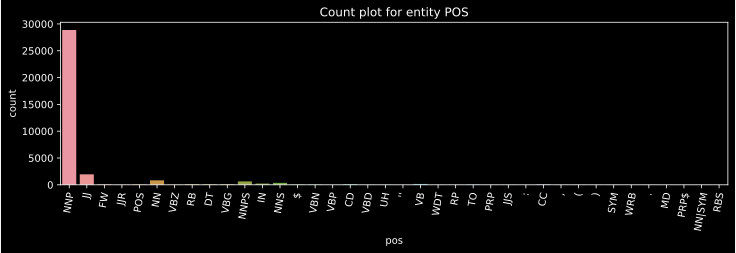

In [16]:
import seaborn as sns
plt.figure(figsize=(12,3))
sns.countplot(x=name_pos_arr)
plt.xticks(rotation = 80);
plt.title(f'Count plot for entity POS')

C:\Users\JONAF\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count plot for NON entity POS')

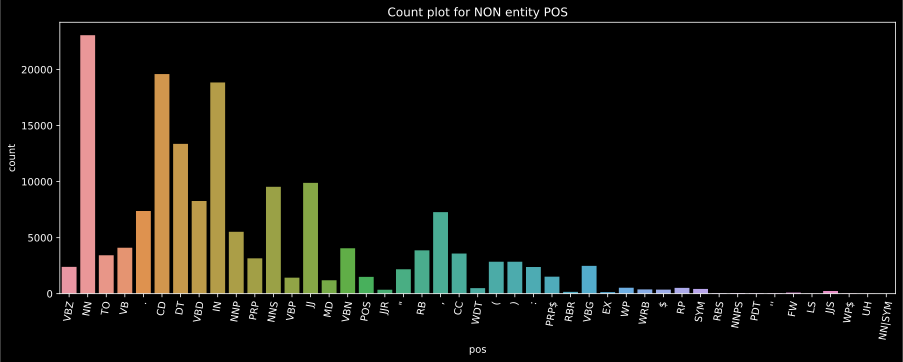

In [17]:
plt.figure(figsize=(15,5))
sns.countplot(not_name_pos_arr)
plt.xticks(rotation = 80);
plt.title(f'Count plot for NON entity POS')


In [84]:
feature_maps = [lambda sentence: [word[0].isupper() for word in sentence[0]],
                lambda sentence: [len(word) for word in sentence[0]],
                lambda sentence: [True if pos == 'NNP' else False for pos in sentence[1]]
                
                # lambda sentence: [ii for ii in range(len(sentence[0]))],
                # lambda sentence: [True if pos == 'NNP' else False for pos in sentence[1]],
                # lambda sentence: [True if pos in ('NN', 'CD', 'IN', 'DT') else False for pos in sentence[1]],
                # lambda sentence: [True if last_pos == 'NNP' else False for last_pos in sentence[2]],
                # lambda sentence: [True if next_pos == 'NNP' else False for next_pos in sentence[3]],
                # lambda sentence: [len(word) > 3 for word in sentence[0]]
                ]

In [61]:
feature_maps = [lambda sentence: [word[0].isupper() for word in sentence[0]],
                lambda sentence: [ii for ii in range(len(sentence[0]))],
                lambda sentence: [True if pos == 'NNP' else False for pos in sentence[1]],
                lambda sentence: [last_pos for last_pos in sentence[2]],
                lambda sentence: [next_pos for next_pos in sentence[3]],
                lambda sentence: [len(word) for word in sentence[0]],
                lambda sentence: [len(sentence) for word in sentence[0]]
                ]

In [81]:
X_train, y_train = dataloading.convert_raw_to_features(sentences_train, feature_maps)

In [82]:
X_eval, y_eval = dataloading.convert_raw_to_features(sentences_eval, feature_maps)

In [85]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=200, max_depth=2, random_state=42)
model.fit(X_train, y_train)
score = model.score(X_eval, y_eval)
score

0.9499435380242203

In [20]:
df = pd.DataFrame({'x': X_train[:,0], 'y':y_train})

In [21]:
df

,x,y
0,1.0,1
1,0.0,0
2,1.0,1
3,0.0,0
4,0.0,0
...,...,...
203616,0.0,0
203617,1.0,1
203618,0.0,0
203619,1.0,1


Text(0.5, 0, 'starts with Caps')

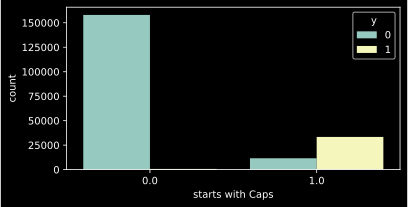

In [22]:
plt.figure(figsize=(6,3))
sns.countplot(data=df, x='x', hue='y')
plt.xlabel('starts with Caps')

In [23]:
X_train

array([[1., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [24]:
df = pd.DataFrame({'x': X_train[:,0], 'y':y_train})


In [28]:
model.feature_importances_

array([0.51730164, 0.01832339, 0.3592789 , 0.04063505, 0.01009278,
       0.01451354, 0.03985471])

In [52]:
score = model.score(X_eval, y_eval)
score

0.9611191152992484

In [29]:
[word for word in sentences_train[3][0]]

['The',
 'European',
 'Commission',
 'said',
 'on',
 'Thursday',
 'it',
 'disagreed',
 'with',
 'German',
 'advice',
 'to',
 'consumers',
 'to',
 'shun',
 'British',
 'lamb',
 'until',
 'scientists',
 'determine',
 'whether',
 'mad',
 'cow',
 'disease',
 'can',
 'be',
 'transmitted',
 'to',
 'sheep',
 '.']

In [30]:
pos_1 = []
word_num = []
for sentence in sentences_train:
    pos_1.append([pos for pos in sentence[1]])
    word_num.append([ii for ii in range(len(sentence[0]))])
pos = reduce(lambda a, b: a+b, pos_1)
num = reduce(lambda a, b: a+b, word_num)

In [31]:
last_pos = pos[:-1]
last_pos.insert(0, 'XX')
next_pos = pos[1:]
next_pos.append('XX')

In [32]:
df = pd.DataFrame({'y': y_train, 'pos': pos, 'num': num, 'last_pos': last_pos, 'next_pos': next_pos})

In [33]:
df

,y,pos,num,last_pos,next_pos
0,1,NNP,0,XX,VBZ
1,0,VBZ,1,NNP,JJ
2,1,JJ,2,VBZ,NN
3,0,NN,3,JJ,TO
4,0,TO,4,NN,VB
...,...,...,...,...,...
203616,0,CD,1,NN,NN
203617,1,NN,0,CD,CD
203618,0,CD,1,NN,NNP
203619,1,NNP,2,CD,CD


In [34]:
entities_df = df[df['y']==1]
non_entities_df = df[df['y']==0]


C:\Users\JONAF\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count plot for entity last POS')

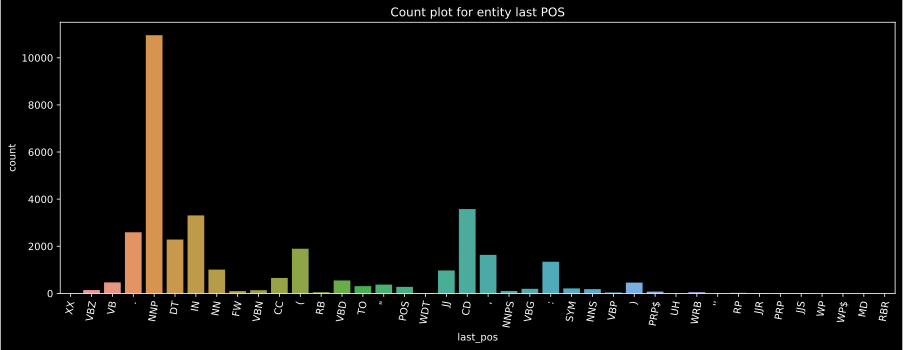

In [35]:
plt.figure(figsize=(15,5))
sns.countplot(entities_df['last_pos'])
plt.xticks(rotation = 80);
plt.title(f'Count plot for entity last POS')

C:\Users\JONAF\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count plot for entity next POS')

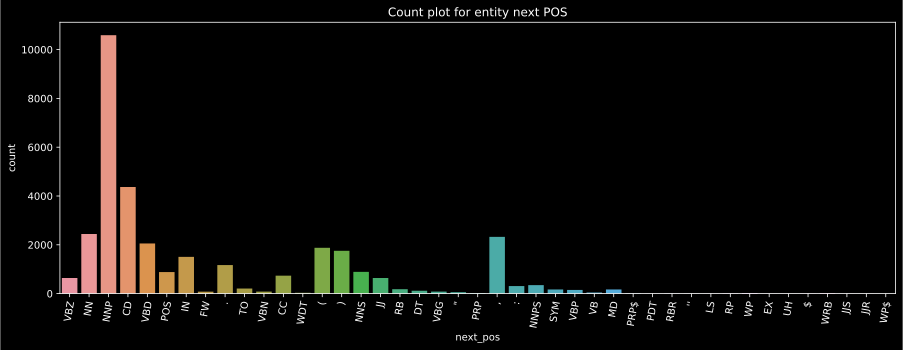

In [36]:
plt.figure(figsize=(15,5))
sns.countplot(entities_df['next_pos'])
plt.xticks(rotation = 80);
plt.title(f'Count plot for entity next POS')

C:\Users\JONAF\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count plot for NON entity next POS')

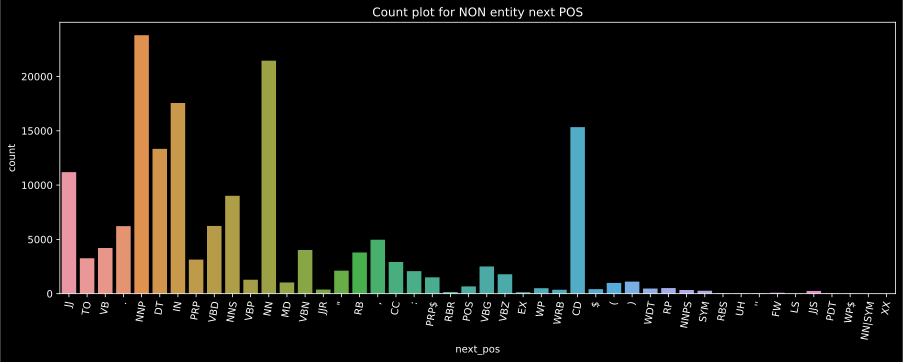

In [37]:
plt.figure(figsize=(15,5))
sns.countplot(non_entities_df['next_pos'])
plt.xticks(rotation = 80);
plt.title(f'Count plot for NON entity next POS')

C:\Users\JONAF\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count plot for NON entity last POS')

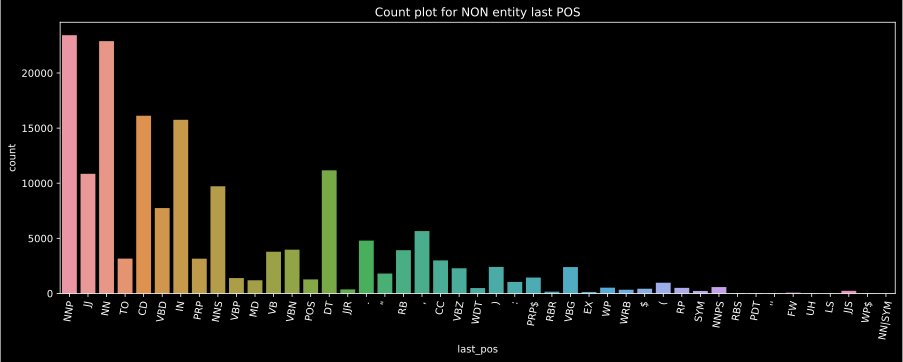

In [38]:
plt.figure(figsize=(15,5))
sns.countplot(non_entities_df['last_pos'])
plt.xticks(rotation = 80);
plt.title(f'Count plot for NON entity last POS')

C:\Users\JONAF\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count plot for NON entity next POS')

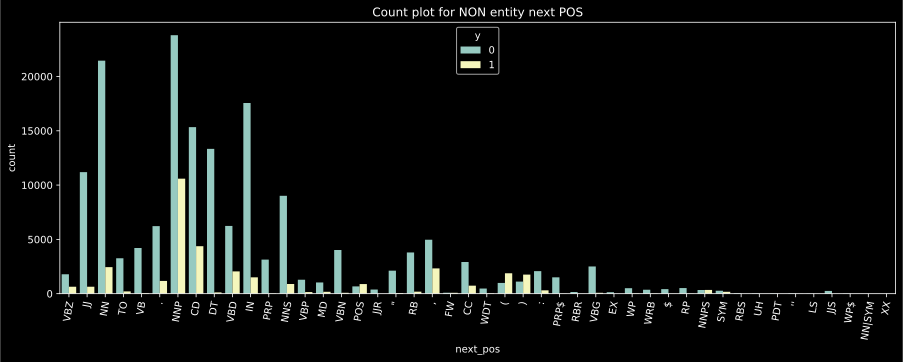

In [39]:
plt.figure(figsize=(15,5))
sns.countplot(df['next_pos'], hue=df['y'])
plt.xticks(rotation = 80);
plt.title(f'Count plot for NON entity next POS')

C:\Users\JONAF\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count plot for NON entity next POS')

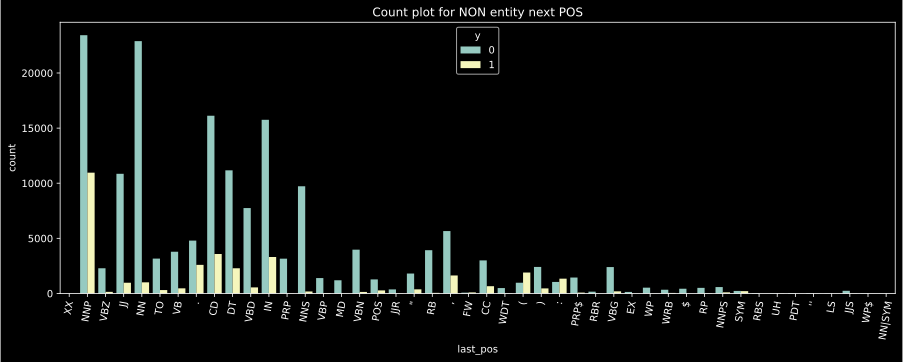

In [40]:
plt.figure(figsize=(15,5))
sns.countplot(df['last_pos'], hue=df['y'])
plt.xticks(rotation = 80);
plt.title(f'Count plot for NON entity next POS')

<AxesSubplot:xlabel='y', ylabel='count'>

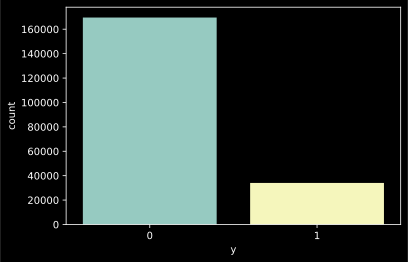

In [41]:
sns.countplot(x=df['y'])

<Figure size 1080x360 with 0 Axes>

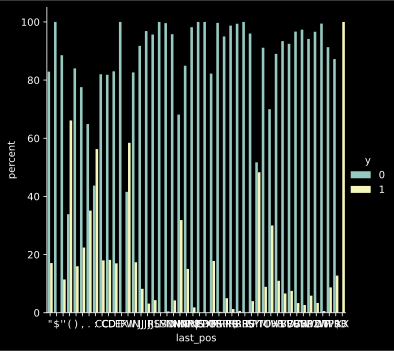

In [42]:
plt.figure(figsize=(15,5))

x,y = 'last_pos', 'y'

(df
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))

In [43]:
sentences_df['word len'] = sentences_df['word'].apply(len)

In [44]:
sentences_df

,word,pos,label,word len
0,EU,NNP,1,2
1,rejects,VBZ,0,7
2,German,JJ,1,6
3,call,NN,0,4
4,to,TO,0,2
...,...,...,...,...
203616,three,CD,0,5
203617,Swansea,NN,1,7
203618,1,CD,0,1
203619,Lincoln,NNP,1,7


In [45]:
np.corrcoef(sentences_df['word len'], sentences_df['label'])

array([[1.        , 0.29717946],
       [0.29717946, 1.        ]])

(0.0, 18.0)

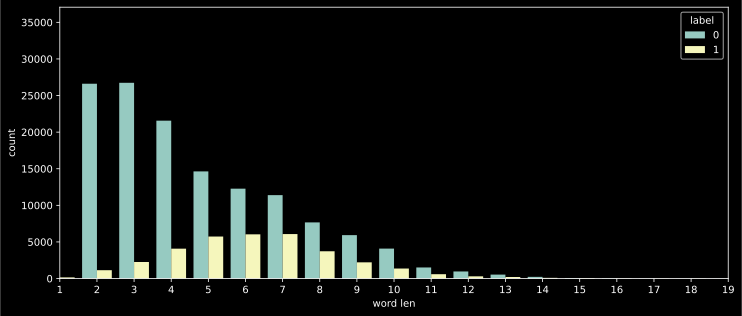

In [46]:
plt.figure(figsize=(12,5))
sns.countplot(data=sentences_df, x='word len', hue='label')
plt.xlim([0,18])